## Working with large datasets using Dask

In [36]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

#### **Task 1: Install Dask and Load the Dataset**

In [ ]:
# pip install dask

In [38]:
import dask.dataframe as dd

# Load the dataset (download the dataset first and place it in the working directory)
file_path = "sales_data.csv"
df = dd.read_csv(file_path)

# Display the first few rows
print(df.head())

   Order ID     Product     Category  Quantity  Unit Price  Total Price  \
0         1      Laptop  Electronics         2       500.0         1000   
1         2  Headphones  Electronics         5       100.0          500   
2         3        Desk    Furniture         1       300.0          300   
3         4       Chair    Furniture         4       150.0          600   
4         5    Notebook   Stationery        10        20.0          200   

   Order Date Region  
0  2023-01-01   East  
1  2023-01-16   West  
2  2023-01-31  North  
3  2023-02-15   East  
4  2023-03-02  South  


#### **Task 2: Filter and Process the Data**

In [40]:
# Filter orders with Total Price > 500
filtered_df = df[df['Total Price'] > 500]

# Extract data for the 'East' region
east_region_df = filtered_df[filtered_df['Region'] == 'East']

# Display the first few rows
print(east_region_df.head())

    Order ID        Product     Category  Quantity  Unit Price  Total Price  \
0          1         Laptop  Electronics         2       500.0         1000   
3          4          Chair    Furniture         4       150.0          600   
5          6         Tablet  Electronics         3       400.0         1200   
18        19  Graphics Card  Electronics         1       600.0          600   

    Order Date Region  
0   2023-01-01   East  
3   2023-02-15   East  
5   2023-03-17   East  
18  2023-09-28   East  


#### **Task 3: Perform Aggregations**

In [42]:
# Total revenue by category
revenue_by_category = df.groupby('Category')['Total Price'].sum()

# Compute the results
revenue_result = revenue_by_category.compute()
print("Total Revenue by Category:")
print(revenue_result)

# Average Unit Price by Region
avg_unit_price_by_region = df.groupby('Region')['Unit Price'].mean()

# Compute the results
avg_price_result = avg_unit_price_by_region.compute()
print("\nAverage Unit Price by Region:")
print(avg_price_result)

Total Revenue by Category:
Category
Electronics    8320
Furniture      1410
Stationery      300
Name: Total Price, dtype: int64

Average Unit Price by Region:
Region
East     307.687500
North    126.000000
South    227.400000
West      76.428571
Name: Unit Price, dtype: float64


#### **Task 4: Visualize the Data**

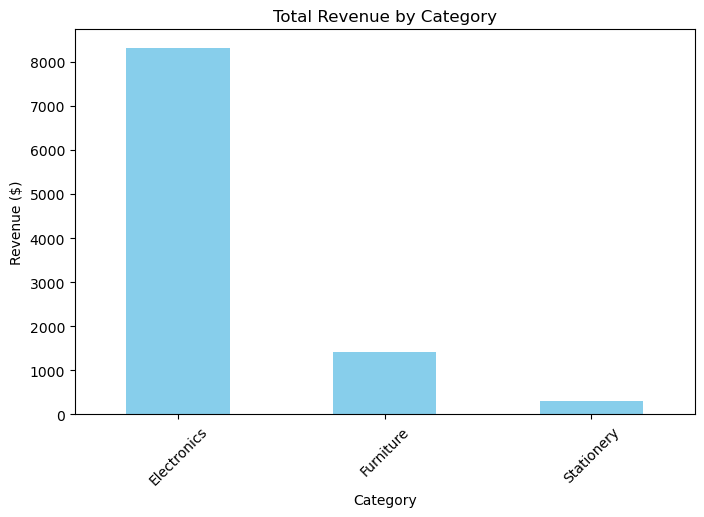

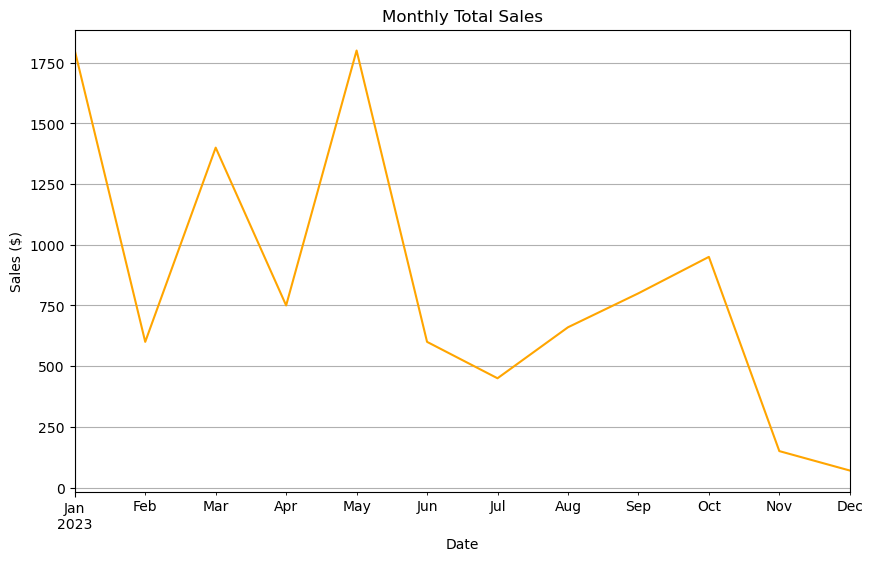

In [44]:
import matplotlib.pyplot as plt

# Bar chart for revenue by category
revenue_result.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Total Revenue by Category")
plt.ylabel("Revenue ($)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

# Line plot of monthly total sales
# Ensure 'Order Date' is in datetime format
df['Order Date'] = dd.to_datetime(df['Order Date'])

# Set 'Order Date' as the index with known divisions
df = df.set_index('Order Date', sorted=True)

# Resample the data by month and calculate the total sales
monthly_sales = df['Total Price'].resample('M').sum()

# Compute the results
monthly_sales_result = monthly_sales.compute()

# Plot the monthly sales
import matplotlib.pyplot as plt

monthly_sales_result.plot(kind='line', color='orange', figsize=(10, 6))
plt.title("Monthly Total Sales")
plt.ylabel("Sales ($)")
plt.xlabel("Date")
plt.grid()
plt.show()

#### **Task 5: Export Results**

In [46]:
# Save the filtered dataset
east_region_df.to_csv("filtered_east_region.csv", single_file=True)
print("filtered_east_region.csv saved successfully!")

# Save the revenue results to a CSV
revenue_result.to_csv("revenue_by_category.csv")
print("revenue_by_category.csv saved successfully!")

filtered_east_region.csv saved successfully!
revenue_by_category.csv saved successfully!
